<a href="https://colab.research.google.com/github/yavik-kapadia/Data-Structures/blob/master/cst383_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from graphviz import Source
from sklearn import preprocessing
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC


In [ ]:
df = pd.read_csv('https://stacks.stanford.edu/file/druid:yg821jf8611/yg821jf8611_ca_san_francisco_2020_04_01.csv.zip',compression='zip', low_memory=False)

# **Traffic Stop Victim Prediction**

Team:


1) lgallez@csumb.edu

2) smendozaloera@csumb.edu	

3) ykapadia@csumb.edu	

#Introduction


According to data from the Stanford Open Policing Project, law enforcement officers in the United States perform around 50,000 traffic stops every day. The project has collected traffic stop data from 40 different states, including the city of San Francisco,  CA, which is the focus of our project. 


#Objective


Previous research has found that racial profiling and bias may play a role in who gets pulled over. Our project aims to predict the race of individuals who were stopped for traffic violations based on the outcome of the traffic stop and subject age.


#Methods


San Francisco Data Set (zip file): https://stacks.stanford.edu/file/druid:yg821jf8611/yg821jf8611_ca_san_francisco_2020_04_01.csv.zip

Stanford Digital Repository: https://purl.stanford.edu/yg821jf8611


Target:
*   race



Predictors:


*   outcome
*   subject_age

Data analysis and visualization: 
* Numpy, Pandas, Matplotlib, and Seaborn 

Scikit-learn 

Models: 
* kNN Classification 
* Decision Tree Classification
* Non-Linear SVC Classification

Features: 
* StandardScaler
* LabelEncoder







#Data Exploration

The San Francisco Police Traffic Stop data contains has 905070 entries from 2008-2014. The data set includes 22 features. Some of these features are: Date, Time, Location, Latitude, Longitude, District, Age, Race, Sex, Outcome, Warning Issued. For the purpose of our objective, we have decided to drop variables that were not relevant to our project. 


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905070 entries, 0 to 905069
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   raw_row_number                     905070 non-null  object 
 1   date                               905070 non-null  object 
 2   time                               905035 non-null  object 
 3   location                           905027 non-null  object 
 4   lat                                903373 non-null  float64
 5   lng                                903373 non-null  float64
 6   district                           852883 non-null  object 
 7   subject_age                        846182 non-null  float64
 8   subject_race                       905070 non-null  object 
 9   subject_sex                        905070 non-null  object 
 10  type                               905070 non-null  object 
 11  arrest_made                        9050

In our initial data exploration, we see that there are a total of 22 columns and 905070 rows. Not all features share the same Dtype. The three dtype features we see are: bool, float64, and object


In [ ]:
not_nums = df.select_dtypes(exclude='number')
not_nums.columns

Index(['raw_row_number', 'date', 'time', 'location', 'district',
       'subject_race', 'subject_sex', 'type', 'arrest_made', 'citation_issued',
       'warning_issued', 'outcome', 'contraband_found', 'search_conducted',
       'search_vehicle', 'search_basis', 'reason_for_stop',
       'raw_search_vehicle_description', 'raw_result_of_contact_description'],
      dtype='object')

There are 19 non-numerical features in this dataset. 

In [ ]:
df.isna().mean()

raw_row_number                       0.000000
date                                 0.000000
time                                 0.000039
location                             0.000048
lat                                  0.001875
lng                                  0.001875
district                             0.057661
subject_age                          0.065065
subject_race                         0.000000
subject_sex                          0.000000
type                                 0.000000
arrest_made                          0.000000
citation_issued                      0.000000
warning_issued                       0.000000
outcome                              0.017326
contraband_found                     0.941020
search_conducted                     0.000000
search_vehicle                       0.000000
search_basis                         0.941020
reason_for_stop                      0.002444
raw_search_vehicle_description       0.000000
raw_result_of_contact_description 

Above we see the fraction of NA values per column. Contraband_found and search_basis being the highest. 


In [ ]:
print("Approximately {} rows contain NA values.".format(df.isna().sum(axis=1).sum()))
df.head()

Approximately 1835818 rows contain NA values.


,raw_row_number,date,time,location,lat,lng,district,subject_age,subject_race,subject_sex,...,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop,raw_search_vehicle_description,raw_result_of_contact_description
0,869921,2014-08-01,00:01:00,MASONIC AV & FELL ST,37.773004,-122.445873,NaN,NaN,asian/pacific islander,female,...,False,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning
1,869922,2014-08-01,00:01:00,GEARY&10TH AV,37.780898,-122.468586,NaN,NaN,black,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
2,869923,2014-08-01,00:15:00,SUTTER N OCTAVIA ST,37.786919,-122.426718,NaN,NaN,hispanic,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
3,869924,2014-08-01,00:18:00,3RD ST & DAVIDSON,37.746380,-122.392005,NaN,NaN,hispanic,male,...,False,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning
4,869925,2014-08-01,00:19:00,DIVISADERO ST. & BUSH ST.,37.786348,-122.440003,NaN,NaN,white,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation


Based on these findings, we will need to drop both columns and rows that contain NA values. This will reduce the amount of rows which will be helpful for our predictor models. 

# Data Pre-Processing 

The San Francisco data report contains variables that will not be used in this project. For example, variables that record date, time, and location will be dropped. 

In addition, we will also remove columns and rows that have missing data. We will also use LabelEncoder from Scikit-Learn to convert our catergorical variables to numerical values. 

Lastly, we will use only a random sample of 50% for data exploration and for modeling. 






In [ ]:
df.drop(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng', 'district', 'contraband_found', 'search_basis', 'raw_search_vehicle_description', 'raw_result_of_contact_description', 'type'], axis=1, inplace=True)
df = df.dropna()
df = df.sample(frac=0.5)
df = df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414850 entries, 0 to 414849
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   subject_age       414850 non-null  float64
 1   subject_race      414850 non-null  object 
 2   subject_sex       414850 non-null  object 
 3   arrest_made       414850 non-null  bool   
 4   citation_issued   414850 non-null  bool   
 5   warning_issued    414850 non-null  bool   
 6   outcome           414850 non-null  object 
 7   search_conducted  414850 non-null  bool   
 8   search_vehicle    414850 non-null  bool   
 9   reason_for_stop   414850 non-null  object 
dtypes: bool(5), float64(1), object(4)
memory usage: 17.8+ MB


After our inital pre-processing, we see that we now have 10 columns. All with the name non-null count. Dtypes are of float64, object, and bool, 


Example of Features:


*   subject_race: 'asian/pacific islander', 'black','hispanic', 'white', 'other'
*   subject_sex: 'female', 'male'
*   arrest_made: True, False
*   citation_issued: True, False
*   warning_issued: True, False
*   outcome: 'warning', 'citation', 'arrest'
*   search_conducted: True, False
*   search_vehicle: True, False


**Data Visualization**



Text(0.5, 0, '')

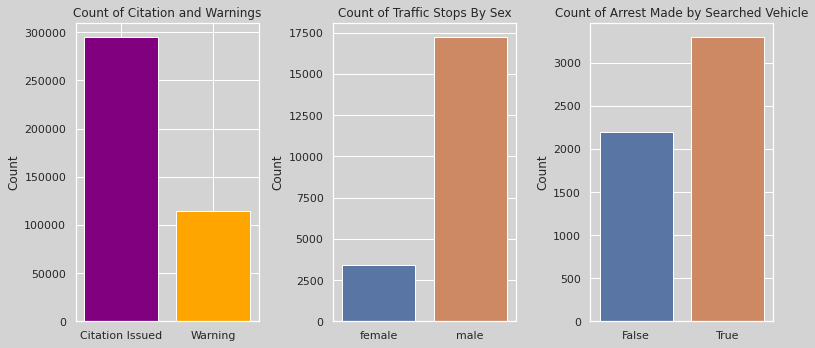

In [ ]:

result = ['Citation Issued', 'Warning']
sum_of_result = [df.citation_issued.sum(), df.warning_issued.sum()]

plt.figure(tight_layout=True, figsize=(11, 5))


plt.subplot(1,3,1)
plt.bar(result, sum_of_result, color=['purple', 'orange'])
plt.title("Count of Citation and Warnings")
plt.ylabel("Count")


sex = df.groupby('subject_sex')['search_vehicle'].sum()
plt.subplot(1,3,2)
sns.barplot(x = sex.index, y = sex.values)
plt.title("Count of Traffic Stops By Sex")
plt.ylabel("Count")
plt.xlabel("")


searched = df.groupby('search_vehicle')['arrest_made'].sum()
plt.subplot(1,3,3)
sns.barplot(x = searched.index, y = searched.values)
plt.title("Count of Arrest Made by Searched Vehicle")
plt.ylabel("Count")
plt.xlabel("")



First we will explore variables in from the data. On the left plot, we have a bar plot that displays the amount of citations vs warnings given. On the middle plot, we have traffic stops by sex of the individual stopped. And on the right plot, we see that police officers performed traffic stops on male subjects more than females.



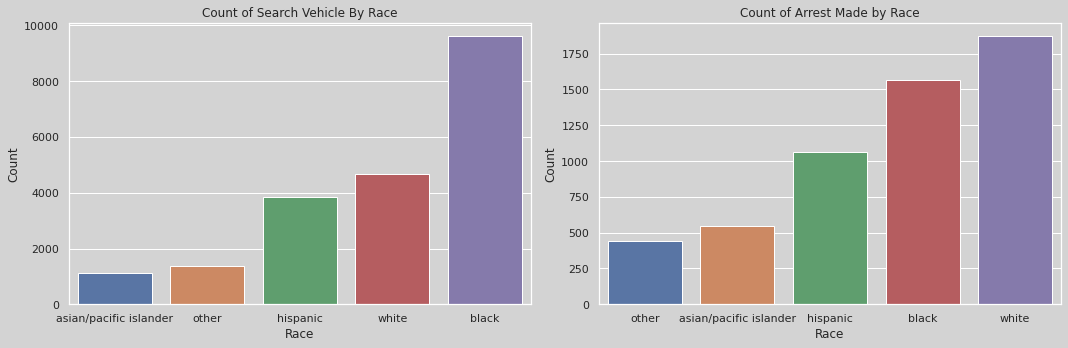

In [ ]:
tick = ['asian/pacific islander', 'black', 'hispanic', 'white', 'other']
search = df.groupby('subject_race')['search_vehicle'].sum().sort_values()
plt.figure(tight_layout=True, figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x = search.index, y = search.values)
plt.title("Count of Search Vehicle By Race")
plt.ylabel("Count")
plt.xlabel("Race")

arrest = df.groupby('subject_race')['arrest_made'].sum().sort_values()
plt.subplot(1,2,2)
sns.barplot(x = arrest.index, y = arrest.values)
plt.title("Count of Arrest Made by Race")
plt.ylabel("Count")
plt.xlabel("Race")
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'})

The bar plot on the left provides context to the outcome of getting your vehicle searched based on race. Police officers performed more vehicle searches on Black individuals when compared to other races.

The plot on the right provides context to the outcome of the traffic stop based on race. According to the bar plot, police officers are arresting Black individuals more than other races.



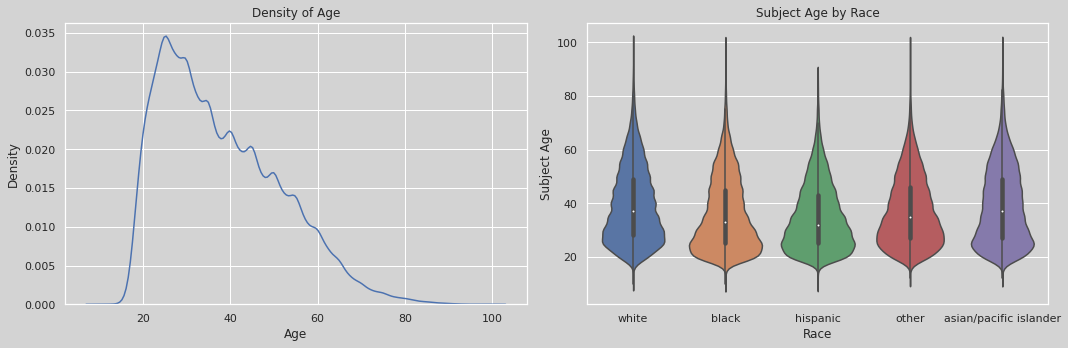

In [ ]:
plt.figure(tight_layout=True, figsize=(15, 5))
plt.subplot(1,2,1)
sns.kdeplot(df['subject_age'])
plt.title('Density of Age')
plt.xlabel('Age')
plt.subplot(1,2,2)
sns.violinplot(data=df, x="subject_race", y="subject_age")
plt.title('Subject Age by Race')
plt.ylabel('Subject Age')
plt.xlabel('Race')
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'})

The dataset has a high density of subjects ranging from 20-30 years old. We used a violin plot to represent the age of people stopped, distributed by race.



Text(0.5, 0, 'Subject Race')

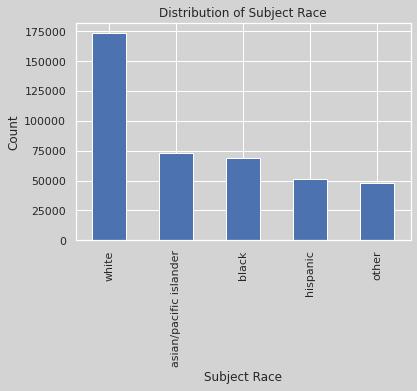

In [ ]:
df.subject_race.value_counts().plot(kind='bar')
plt.title('Distribution of Subject Race')
plt.ylabel('Count')
plt.xlabel('Subject Race')

In [ ]:
df.subject_race.value_counts()

white                     173543
asian/pacific islander     72944
black                      68921
hispanic                   51534
other                      47908
Name: subject_race, dtype: int64

Subject race seems to be skewed where there are more white subjects in the dataset. 

Lastly we will use label encoder to convert our predictor feature, outcome, and our target feature, race, to numerical values. 

**Final Pre-processing**

In [ ]:
df ['outcome'] = preprocessing.LabelEncoder().fit_transform(df['outcome'])
df ['subject_race'] = preprocessing.LabelEncoder().fit_transform(df['subject_race'])

In [ ]:
df.subject_race.value_counts()

4    173543
0     72944
1     68921
2     51534
3     47908
Name: subject_race, dtype: int64

Subject Race is encoded as follow:
* 'White': 4
* 'Asian/Pacific Islander': 0
* 'Black': 1
* 'Hispanic': 2
* 'Other': 3

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414850 entries, 0 to 414849
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   subject_age       414850 non-null  float64
 1   subject_race      414850 non-null  int64  
 2   subject_sex       414850 non-null  object 
 3   arrest_made       414850 non-null  bool   
 4   citation_issued   414850 non-null  bool   
 5   warning_issued    414850 non-null  bool   
 6   outcome           414850 non-null  int64  
 7   search_conducted  414850 non-null  bool   
 8   search_vehicle    414850 non-null  bool   
 9   reason_for_stop   414850 non-null  object 
dtypes: bool(5), float64(1), int64(2), object(2)
memory usage: 17.8+ MB


After our final preprocing we have 10 variables. Five of these variables are of dtype bool, one is of float64, two are of int64, and 2 are of object. 

#KNN Classification

Our first machine learning method we will use to predict subject_race is the KNN Classification. For this algorithm we used a random sample (5000) of our data in order for the model to run faster.  

In [ ]:
def get_best(ks, acc):
    return ks[(acc.index(max(acc)))]

In [ ]:
def get_train_test_accuracy(knn, X_train, X_test, y_train, y_test):
    knn.fit(X_train,y_train)
    prediction = knn.predict(X_test) 
    return accuracy_score(y_test, prediction)

In [ ]:
np.random.seed(42)  

predictors = ['outcome', 'subject_age']
X = df[predictors].values
y = df['subject_race'].values

indexes = np.random.choice(y.size, size=5000)
X_mini = X[indexes]
y_mini = y[indexes]

X_train, X_test, y_train, y_test = train_test_split(X_mini, y_mini, test_size=0.30, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Getting the best K
n = 30
test_acc = []
ks = np.arange(1, n+1, 2)
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute', metric='minkowski')
    acc_te = get_train_test_accuracy(knn, X_train, X_test, y_train, y_test)
    test_acc.append(acc_te)
best_k = get_best(ks, test_acc)

knn = KNeighborsClassifier(n_neighbors= best_k, algorithm='brute', metric='minkowski')
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)


Lets see how the first ten predicted values look when comapred to the actual values.  

In [ ]:
print("Predictions: {}".format(y_predict[:10]))
print("Actual: {}".format(y_test[:10]))

Predictions: [4 4 4 4 4 4 4 4 4 4]
Actual: [4 3 2 4 0 1 4 4 4 4]


**Accuracy** 

Based the accuracy score for this model, we see that KNN classification may not be the best model for our objective. 

In [ ]:
print('Accuracy: {:.2f}'.format((y_predict == y_test).mean()))

Accuracy: 0.39


**Confusion Matrix**

Our confusion matrix below shows that out model is mostly predicting race as White (4). 

In [ ]:
pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2,4
Actual,,,,
0,23,20,16,224
1,13,41,12,175
2,9,23,12,144
3,9,14,6,135
4,40,43,26,515


Text(30.5, 0.5, 'actual')

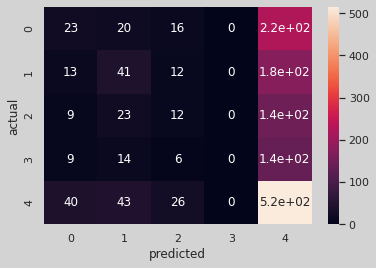

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")

**Learning Curve**

The learning curve for our KNN classification shows that as the training size increases, the difference between the test score and training score becomes smaller. We also seem to be overfitting. 

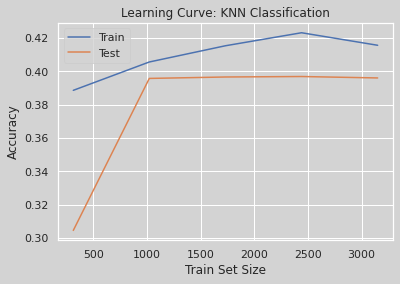

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, cv=10, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores = np.mean(test_scores, axis=1)


plt.plot(train_sizes, train_scores_mean, label='Train')
plt.plot(train_sizes, test_scores, label='Test')
plt.title('Learning Curve: KNN Classification')
plt.xlabel('Train Set Size')
plt.ylabel('Accuracy')
plt.legend()

**Forward Selection**

Our accuracy score is less that 50%. Lets see if adding more features improves our accuracy score. Again we will be using a random sample size of 5,000. We will also convert all the categorical values to numerical ones. 

In [ ]:
all_num = df = pd.get_dummies(df, drop_first = True)
all_features = list(all_num.columns)
all_features.remove('subject_race')
np.random.seed(42)  

X = all_num[all_features].values
y = all_num['subject_race'].values

indexes = np.random.choice(y.size, size=5000)
X_mini = X[indexes]
y_mini = y[indexes]

X_train, X_test, y_train, y_test = train_test_split(X_mini, y_mini, test_size=0.30, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors= best_k, algorithm='brute', metric='minkowski')
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [ ]:
remaining = list(range(X_train.shape[1]))
selected = []
n = 5
while len(selected) < n:
    accuracy = 1e7
    for i in remaining:
        scores = cross_val_score(KNeighborsClassifier(n_neighbors= best_k, algorithm='brute', metric='minkowski'), X_train[:, selected+[i]], y_train, scoring='accuracy', cv=10)
        if scores.mean() < accuracy:
          accuracy = (predictions == y_test).mean() 
          i_min = i
    remaining.remove(i_min)
    selected.append(i_min)
    print('num features: {}; accuracy: {:.2f}'.format(len(selected), accuracy))

num features: 1; accuracy: 0.41
num features: 2; accuracy: 0.41
num features: 3; accuracy: 0.41
num features: 4; accuracy: 0.41
num features: 5; accuracy: 0.41


By seeing 10 features being added, do not see a significant improvement. As a result, we will keep the two predictors (outcome, subject_age) to predict our target feature. These features will be used for our other models below.  

#Non-Linear SVC Classification

**Accuracy**

In [ ]:
np.random.seed(42)  

predictors = ['outcome', 'subject_age']
X = df[predictors].values
y = df['subject_race'].values

indexes = np.random.choice(y.size, size=5000)
X_mini = X[indexes]
y_mini = y[indexes]

X_train, X_test, y_train, y_test = train_test_split(X_mini, y_mini, test_size=0.30, random_state=42)

clf = make_pipeline(StandardScaler(), SVC(gamma='scale'))
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predict)))

Accuracy: 0.41


**Cofusion Matrix**

Looking at this confusion matrix we see the same trend as before, where the model is predicting White (4) more often as the race. 

In [ ]:
pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])

Predicted,1,2,4
Actual,,,
0,0,1,282
1,3,1,237
2,1,0,187
3,1,0,163
4,4,2,618


Text(30.5, 0.5, 'actual')

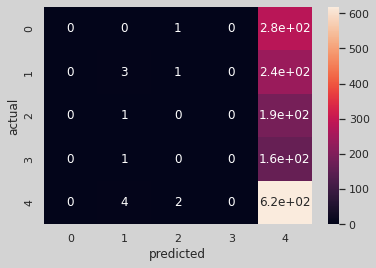

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")

**Learning Curve**

There seems to be no improvement in the test accuracy score if we increase the training set size. It seems to get worse if the size is greater than 3000. 

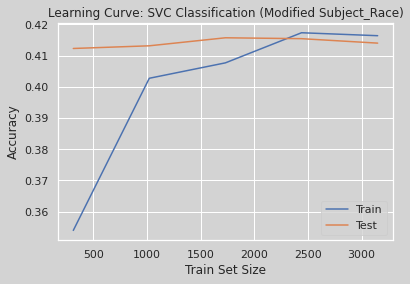

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=10, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Train')
plt.plot(train_sizes, test_scores, label='Test')
plt.title('Learning Curve: SVC Classification (Modified Subject_Race)')
plt.xlabel('Train Set Size')
plt.ylabel('Accuracy')
plt.legend()

#Decision Tree Classification

Now we will us the Decision Tree Classification model to see how it performance and accuracy score. 

In [ ]:
predictors = ['outcome', 'subject_age']
X = df[predictors].values
y = df['subject_race'].values

indexes = np.random.choice(y.size, size=5000)
X_mini = X[indexes]
y_mini = y[indexes]

X_train, X_test, y_train, y_test = train_test_split(X_mini, y_mini, test_size=0.30, random_state=0)

clf = DecisionTreeClassifier(max_depth = 2, random_state=0)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

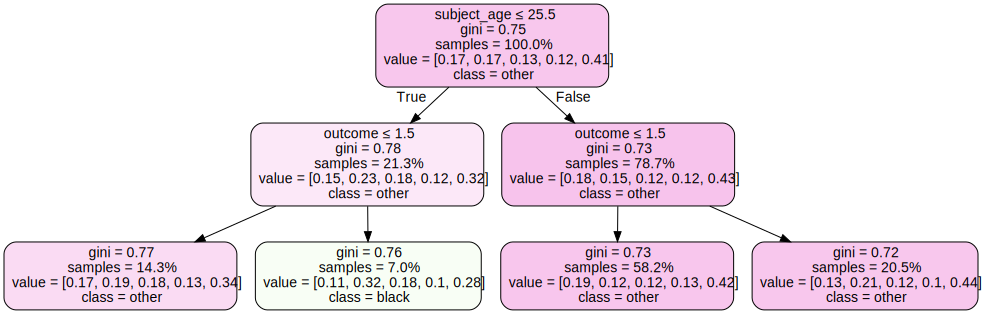

In [ ]:
target_names = ['asian/pacific islander', 'black','hispanic', 'white', 'other']
n = export_graphviz(clf,precision=2, feature_names=predictors, proportion=True, class_names=target_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(n)
graph

**Accuracy**

Our accuracy of this model performed worse that the KNN and SVC model. 

In [ ]:
print('Accuracy: {:.2f}'.format((y_predict == y_test).mean()))

Accuracy: 0.41


**Confusion Matrix**

There appears to be a pattern. Our models are predicting race to be White at a higher frequency. 

In [ ]:
pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])

Predicted,1,4
Actual,,
0,11,253
1,28,229
2,13,170
3,11,168
4,27,590


Text(30.5, 0.5, 'actual')

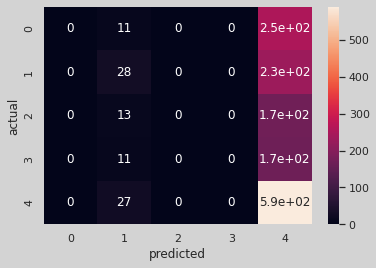

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")

**Learning Curve**

We see and improvement of accuracy score as the training set size increases. We also see that the difference between the training and test score becomes smaller as the size increases. 

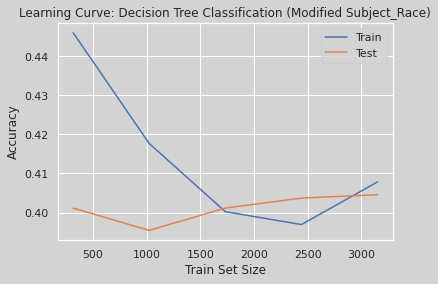

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=10, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores = np.mean(test_scores, axis=1)


plt.plot(train_sizes, train_scores_mean, label='Train')
plt.plot(train_sizes, test_scores, label='Test')
plt.title('Learning Curve: Decision Tree Classification (Modified Subject_Race)')
plt.xlabel('Train Set Size')
plt.ylabel('Accuracy')
plt.legend()

Overall our three models had a accuracy percentage that was < 50% we saw that adding more features to our model was neither and advantage or disadvantage. Although we saw a slight increase in accuracy with using a Decision Tree & SVC model vs KNN, it mostly predicted two subject races (Other and White). 

It may be the case that most of the data on this dataset contains more reports of White subjects than others. 

We will repeat the same models but now we will determine if there is a differnce in accuracy when we predict if the subject's race is White or Other. Other will be a combination of races in the dataset that are not White. 

In [ ]:
other_df = df
other_df.subject_race = other_df.subject_race.replace({1:0, 2:0, 3:0, 4:1})

#KNN Classification

We will do another KNN Classification to predict if the subject_race is White or Other. We will see how tuning the target variable effects the accuracy score. Again, we will be using a smaller random sample from our data, 1500.

**Accuracy**

By using our new target variable we see that our accuracy score increased. There is a huge difference between this accuracy score from the previous ones. 

In [ ]:
np.random.seed(42)  

predictors = ['outcome', 'subject_age']
X = other_df[predictors].values
y = other_df['subject_race'].values

indexes = np.random.choice(y.size, size=5000)
X_mini = X[indexes]
y_mini = y[indexes]

X_train, X_test, y_train, y_test = train_test_split(X_mini, y_mini, test_size=0.30, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Getting the best K
n = 30
test_acc = []
ks = np.arange(1, n+1, 2)
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute', metric='minkowski')
    acc_te = get_train_test_accuracy(knn, X_train, X_test, y_train, y_test)
    test_acc.append(acc_te)
best_k = get_best(ks, test_acc)


knn = KNeighborsClassifier(n_neighbors= best_k, algorithm='brute', metric='minkowski')
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

print('Accuracy: {:.2f}'.format((y_predict == y_test).mean()))


Accuracy: 0.57


**Confusion Matrix**

Now that we are only predicting if the subject is White or Other we see our model make less predictions on the subject being White. 

In [ ]:
pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,728,148
1,492,132


Text(30.5, 0.5, 'actual')

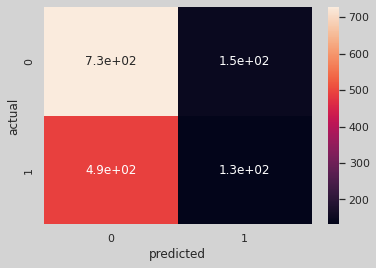

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")

**Learning Curve**

The learning curve shows the case of overfitting, high variance. Our test score does not seem to improve and the training set size increases. 

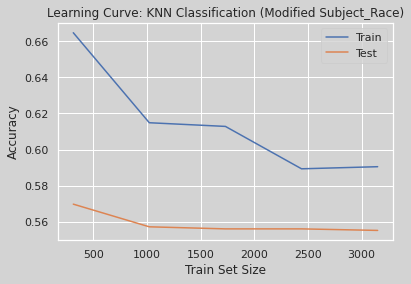

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, cv=10, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores = np.mean(test_scores, axis=1)


plt.plot(train_sizes, train_scores_mean, label='Train')
plt.plot(train_sizes, test_scores, label='Test')
plt.title('Learning Curve: KNN Classification (Modified Subject_Race)')
plt.xlabel('Train Set Size')
plt.ylabel('Accuracy')
plt.legend()

#Non-Linear SVC Classification

Next we will see how the SVC model performs with our target variable. We will also use a random sample of 1500 for this model. 

**Accuracy**

Again, our model had an improvement in accuracy score. 

In [ ]:
np.random.seed(42)  

predictors = ['outcome', 'subject_age']
X = other_df[predictors].values
y = other_df['subject_race'].values

indexes = np.random.choice(y.size, size=5000)
X_mini = X[indexes]
y_mini = y[indexes]

X_train, X_test, y_train, y_test = train_test_split(X_mini, y_mini, test_size=0.30, random_state=42)

clf = make_pipeline(StandardScaler(), SVC(gamma='scale'))
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predict)))

Accuracy: 0.60


**Confusion Matrix**

Again, we see less instance of our model predicting the subject's race as White. Our model does predict Other as the subject race better than before. 

In [ ]:
pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,864,12
1,593,31


Text(30.5, 0.5, 'actual')

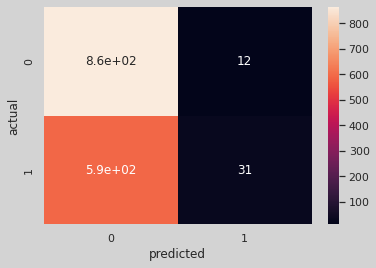

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")

**Learning Curve**

Our learning curve for Decission Tree shows a high bias, underfitting. The difference between scores gets smaller as we increase the training set size. 

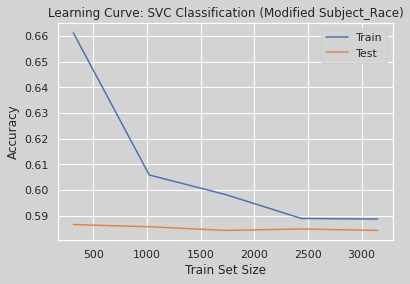

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=10, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores = np.mean(test_scores, axis=1)


plt.plot(train_sizes, train_scores_mean, label='Train')
plt.plot(train_sizes, test_scores, label='Test')
plt.title('Learning Curve: SVC Classification (Modified Subject_Race)')
plt.xlabel('Train Set Size')
plt.ylabel('Accuracy')
plt.legend()

#Decision Tree Classification

Now we will perform the Decision Tree model to determine if there is a difference in accuracy. 

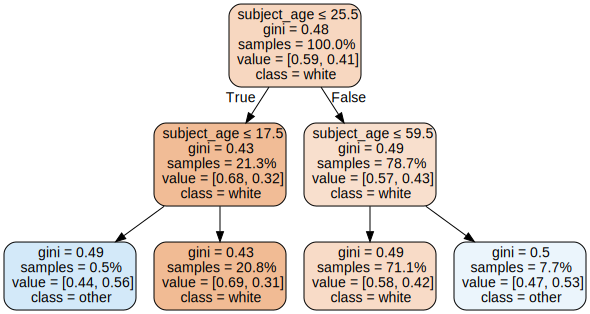

In [ ]:
predictors = ['outcome', 'subject_age']
X = other_df[predictors].values
y = other_df['subject_race'].values

indexes = np.random.choice(y.size, size=5000)
X_mini = X[indexes]
y_mini = y[indexes]

X_train, X_test, y_train, y_test = train_test_split(X_mini, y_mini, test_size=0.30, random_state=0)

clf = DecisionTreeClassifier(max_depth = 2, random_state=0)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

target_names = ['white','other']
n = export_graphviz(clf,precision=2, feature_names=predictors, proportion=True, class_names=target_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(n)
graph

**Accuracy**

Our accuracy score showed a huge improvement from the prevous models. 

In [ ]:
print('Accuracy: {:.2f}'.format((y_predict == y_test).mean()))


Accuracy: 0.58


**Confusion Matrix**


In [ ]:
pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,817,66
1,563,54


Text(30.5, 0.5, 'actual')

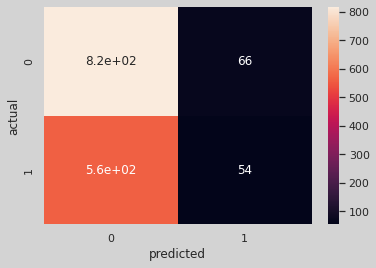

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")

**Learning Curve**

Our learning curve for Decission Tree shows a high bias, underfitting. We see a drop in the accuracy score for the test score between train set size between 200-800. 

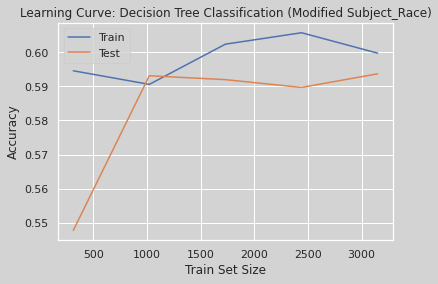

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=10, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores = np.mean(test_scores, axis=1)


plt.plot(train_sizes, train_scores_mean, label='Train')
plt.plot(train_sizes, test_scores, label='Test')
plt.title('Learning Curve: Decision Tree Classification (Modified Subject_Race)')
plt.xlabel('Train Set Size')
plt.ylabel('Accuracy')
plt.legend()

#Summary

For this project we used three different models: KNN, Decision Tree, and SVC. There was a total of 6 observations. In the first three observations we used all races in the dataset ('asian/pacific islander', 'black','hispanic', 'white', 'other'). We noticed a low accuracy scores for these models. There was a slight improvement in accuracy score when we used the Decision Tree and SVC models but overall scores remained below 50%. 

Based on the distrubution of race on the dataset, we wanted to see how the models would predict if the subject was White or another race. This led us to conduct 3 additional observations. To do this we combined all the other races that are not Black and performed the same three models. Our accuracy scores improved from tuning our data and obtained scores higher than 50%. The Decision Tree model gave us the best accuracy score. 

Apart from our models we also examined the effect of features. We noticed that increasing the number of predictor features did not improve our accuracy score.We also saw how increasing the training set size did not improve our test accuracy score. In addition, we saw cases of both overfitting and underfitting in our learning curves. 

Our project's objective was to see if we can predict the subject's race based on two features, outcome and subject age. Based on our models, our results show that there is a better chance of predicting if the subject is either White or another race. 